## AutoScout Car Price Prediction Capstone Project

AutoScout Car Price Prediction is my capstone project in data analysis and data visualization that aims to predict car prices based on various features. The project uses data scraped from an online car trading company's website in 2022, containing information about 13 different car makes and 594 models. 

The project is divided into three main parts: data cleaning, data imputation, and handling outliers using visualization libraries. The first part involves cleaning the data by dealing with incorrect headers, formats, anomalies, and dropping useless columns. The second part focuses on filling in missing values and converting categorical data to numeric data through encoding. Finally, in the third part, outliers in the data are identified and handled through the use of visualization libraries, allowing for valuable insights to be extracted.

The project utilizes a variety of commonly used algorithms in data cleaning and exploratory data analysis, including Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, and Scipy. With a clean dataset in hand, the project then moves on to predictive modeling using machine learning techniques.

Overall, AutoScout Car Price Prediction is an innovative project that demonstrates the power of data analysis and visualization in making predictions and gaining insights. It has practical applications for the automotive industry and showcases the importance of data-driven decision making.

### Part-3 Handling With Outliers 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('C:/Users/ihsankoo/Desktop/Clarusway/Data Science/Car price prediction capstone project/after_part2.csv')

<AxesSubplot:>

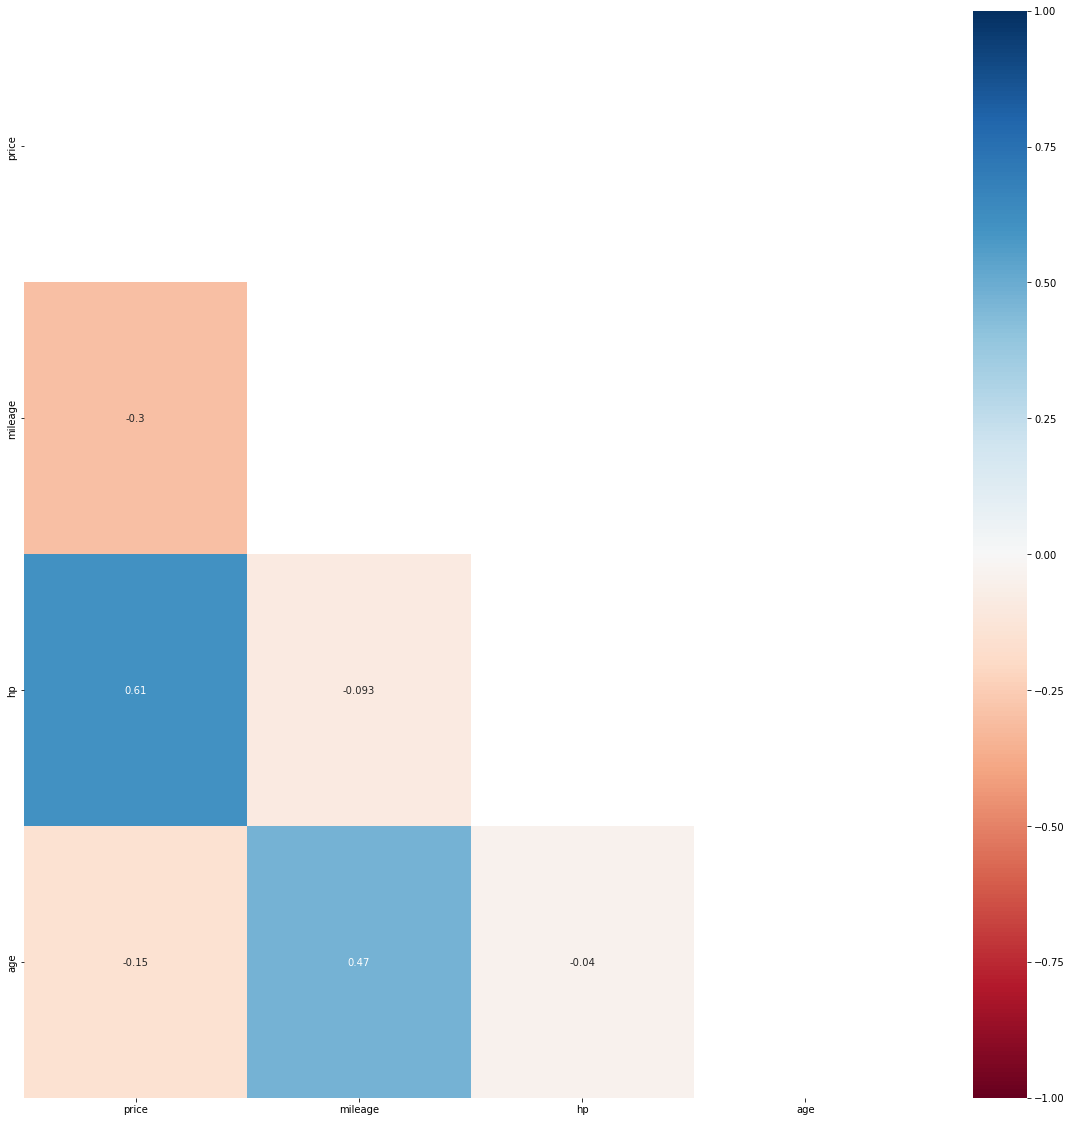

In [3]:
plt.figure(figsize=(20,20))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1,cmap='RdBu')

In [4]:
dummies_em = df['entertainment_media'].str.get_dummies(sep=', ').add_prefix('em_')

In [5]:
dummies_ss = df['safety_security'].str.get_dummies(sep=', ').add_prefix('ss_')

In [6]:
dummies_cc = df.comfort_convenience.str.get_dummies(sep=', ').add_prefix('cc_')

In [7]:
dummies_ex = df.extras.str.get_dummies(sep=', ').add_prefix('ex_')

In [8]:
df_dummied = pd.get_dummies(df.drop(['make','model','entertainment_media','safety_security','comfort_convenience','extras'], axis=1), drop_first = True)

In [9]:
df_dummied = pd.concat([df_dummied, dummies_em,dummies_ss,dummies_cc,dummies_ex], axis=1)

In [10]:
new_column_names1 = {col: col.lower().replace('\n', '').strip().replace('\\', '').replace('\"', '').replace('&', '').replace('co₂', 'co2').replace('-', '_').replace(' ', '_').replace('__', '_').replace('(', '').replace(')', '') for col in df_dummied.columns}
new_column_names1

{'price': 'price',
 'mileage': 'mileage',
 'hp': 'hp',
 'age': 'age',
 'make_model_Dacia Break': 'make_model_dacia_break',
 'make_model_Dacia Dokker': 'make_model_dacia_dokker',
 'make_model_Dacia Duster': 'make_model_dacia_duster',
 'make_model_Dacia Jogger': 'make_model_dacia_jogger',
 'make_model_Dacia Lodgy': 'make_model_dacia_lodgy',
 'make_model_Dacia Logan': 'make_model_dacia_logan',
 'make_model_Dacia Sandero': 'make_model_dacia_sandero',
 'make_model_Dacia Spring': 'make_model_dacia_spring',
 'make_model_Fiat ': 'make_model_fiat',
 'make_model_Fiat 124 Coupè': 'make_model_fiat_124_coupè',
 'make_model_Fiat 124 Spider': 'make_model_fiat_124_spider',
 'make_model_Fiat 126': 'make_model_fiat_126',
 'make_model_Fiat 127': 'make_model_fiat_127',
 'make_model_Fiat 128': 'make_model_fiat_128',
 'make_model_Fiat 130': 'make_model_fiat_130',
 'make_model_Fiat 131': 'make_model_fiat_131',
 'make_model_Fiat 500': 'make_model_fiat_500',
 'make_model_Fiat 500 Abarth': 'make_model_fiat_500_

In [11]:
df_dummied = df_dummied.rename(columns=new_column_names1)
df_dummied.columns

Index(['price', 'mileage', 'hp', 'age', 'make_model_dacia_break',
       'make_model_dacia_dokker', 'make_model_dacia_duster',
       'make_model_dacia_jogger', 'make_model_dacia_lodgy',
       'make_model_dacia_logan',
       ...
       'ex_tuned_car', 'ex_tuned_car'', 'ex_voice_control', 'ex_voice_control',
       'ex_voice_control'', 'ex_winter_package', 'ex_winter_package',
       'ex_winter_package'', 'ex_winter_tyres', 'ex_winter_tyres''],
      dtype='object', length=21947)

In [13]:
df_dummied.shape

(28630, 21947)

In [12]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)